# 07. 예측모델 실습

예측 모델의 정확도를 높이기 위해 어떠한 방법을 사용하는지 확인해봅니다.

* **분석데이터**:
  https://www.kaggle.com/c/bike-sharing-demand

## Step1. LinearRegressor를 사용하여 분류기 만들기

### 데이터 클렌징 및 가공

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

bike_df = pd.read_csv('./dataset/bike_sharing_demand_train.csv')

**Data Fields**

- datetime - 대여날짜 및 시간 
- season - 계절 (1 = 봄, 2 = 여름, 3 = 가을, 4 = 겨울 ) 
- holiday - 휴일 
- workingday - 주말과 휴일을 제외한 날 (평일) 
- weather - 날씨 * 1: 맑음, 대체로 흐림, 일부 흐림 * 2: 안개 + 흐림, 안개 + 깨진 구름, 안개 + 구름이 거의 없음, 안개 * 3: 가벼운 눈, 가벼운 비 + 뇌우 + 흩어진 구름, 가벼운 비 + 흩어진 구름 * 4: 폭우 + 얼음 팔레트 + 뇌우 + 안개, 눈 + 안개 
- temp - 섭씨 온도 
- atemp - 체감 온도 
- humidity - 상대 습도 
- windspeed - 풍속 
- casual - 미등록 사용자의 대여 횟수 
- registered - 등록된 사용자의 대여 횟수 
- count - 총 대여수

### [Q1] 분석할 데이터는 몇 개의 feature, 몇 개의 데이터로 구성되어 있습니까?

In [2]:
#[Q1]을 해결하기 위한 코드를 작성하세요
# bike_df.shape
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


### [Q2] bike_df의 데이터 중 숫자가 아닌 데이터가 포함된 필드가 있습니까?

In [3]:
#[Q2]을 해결하기 위한 코드를 작성하세요
# bike_df.isna().sum()
bike_df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

### [Q3]'datetime'에 있는 값을 'year', 'month', 'day', 'hour' 필드에 파싱하여 넣어주세요.
예)
2011-01-01 00:00:00 -> 2011	1	1	0

(힌트)
python의 'datetime64' 포맷을 활용해보세요

In [4]:
#[Q3]을 해결하기 위한 코드를 작성하세요
bike_df['datetime'] = bike_df['datetime'].astype('datetime64')     # 날짜형으로 형 변환
bike_df['year'] = bike_df['datetime'].dt.year
bike_df['month'] = bike_df['datetime'].dt.month
bike_df['day'] = bike_df['datetime'].dt.day
bike_df['hour'] = bike_df['datetime'].dt.hour
bike_df['minute'] = bike_df['datetime'].dt.minute
bike_df['second'] = bike_df['datetime'].dt.second
bike_df.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0


### [Q4] 각 데이터 필드의 값을 확인하시고, 불필요한 필드는 제거해주세요

(힌트)
dataframe의 drop()

In [5]:
#[Q4]을 해결하기 위한 코드를 작성하세요

In [6]:
drop_columns = ['datetime', 'casual', 'registered']
bike_df.drop(drop_columns, axis=1, inplace=True)

# del 같은거 써도 된다!

In [7]:
bike_df.head(1)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour,minute,second
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,0,0,0


In [8]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   count       10886 non-null  int64  
 9   year        10886 non-null  int64  
 10  month       10886 non-null  int64  
 11  day         10886 non-null  int64  
 12  hour        10886 non-null  int64  
 13  minute      10886 non-null  int64  
 14  second      10886 non-null  int64  
dtypes: float64(3), int64(12)
memory usage: 1.2 MB


### [Q5] 모델을 만들기 위해 train set과 test set으로 분리해주세요.
 1) 종속변수y 에 해당하는 값을 Y로 할당    
 2) 독립변수x 에 해당하는 값을 X로 할당  
 3) train_test_split 함수를 사용해서 분리(train:test = 7:3, random_state=0)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#[Q5]을 해결하기 위한 코드를 작성하세요

y = bike_df['count']
X = bike_df.drop(['count'],axis=1,inplace=False)


# 학습용 데이터와 테스트용 데이터로 나눔
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=0.3, random_state=1)
# 30%만 테스트로 쓰겠습니다!
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

7620
3266
7620
3266


### [Q6] LinearRegression을 사용하여 예측하는 모델을 학습시킵니다.

In [10]:
#[Q6]을 해결하기 위한 코드를 작성하세요
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train ,y_train )

LinearRegression()

### [Q7] 모델을 사용하여 테스트 셋으로 분리한 값(X_test)의 예측값을 구합니다.

In [11]:
#[Q7]을 해결하기 위한 코드를 작성하세요

y_preds = lr.predict(X_test)

print('bias:',lr.intercept_)
print('weight:', np.round(lr.coef_, 1))
print(len(y_preds))

bias: -158986.6555020266
weight: [-10.2 -18.4  -0.8  -5.1   1.4   4.8  -2.    0.6  79.1  10.9   0.4   7.9
   0.    0. ]
3266


In [12]:
y_preds

array([179.05103681,  66.45224683, 380.80841321, ..., 132.45612664,
       122.07192998, 291.92058159])

In [13]:
bike_df.head(2)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour,minute,second
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,0,0,0
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,1,0,0


### [Q8] 모델의 정확도를 측정합니다. 
이 대회에서 정확도 평가는 RMSLE(Root Mean Squared Log Error)입니다. RMSLE는 아래 함수를 사용하세요

In [14]:
def rmsle(y, pred):
    log_y = np.log1p(y)             
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    print('RMSLE: {0:.4f}'.format(rmsle))
    return rmsle
rmsle(y_test, y_preds)

RMSLE: 1.1447


1.1446657413959536

In [15]:
#[Q8]을 해결하기 위한 코드를 작성하세요


## Step2. 모델 성능 개선하기

### [Q1] 예측값과 실제값의 차이가 가장 많이 나는 데이터 5개 출력
아래 함수를 실행시켜 보세요

In [16]:
y_test

3709     308
6741      14
9848     539
1410     143
10672      1
        ... 
9192     123
6257      73
5829       2
10360     49
10253    382
Name: count, Length: 3266, dtype: int64

In [17]:
def get_top5_error_data(y_test, pred):
    # DataFrame에 컬럼들로 실제 대여횟수(count)와 예측 값을 서로 비교 할 수 있도록 생성. 
    result_df = pd.DataFrame(y_test.values, columns=['real_count'])
    # 예측값(pred)을 새로운 컬럼에 넣기
    result_df['predicted_count']= np.round(pred)
    # 실제값과 예측값과의 차이를 diff에 넣기
    result_df['diff'] = np.abs(result_df['real_count'] - result_df['predicted_count'])
    # 예측값과 실제값이 가장 큰 데이터 순으로 출력. 
    print(result_df.sort_values('diff', ascending=False)[:5])

get_top5_error_data(y_test, y_preds)

      real_count  predicted_count   diff
1950         809            191.0  618.0
1451         948            360.0  588.0
76           917            336.0  581.0
1302         970            410.0  560.0
1551         798            241.0  557.0


In [18]:
#[Q1]을 해결하기 위한 코드를 작성하세요


### [Q2] Y값 분포 시각화하기

(힌트) 히스토그램을 그려보세요.

<AxesSubplot:>

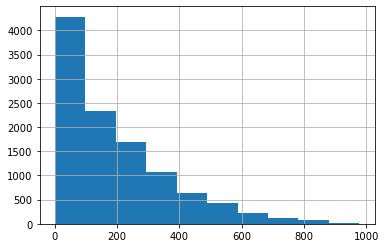

In [19]:
#[Q2]을 해결하기 위한 코드를 작성하세요
y.hist()


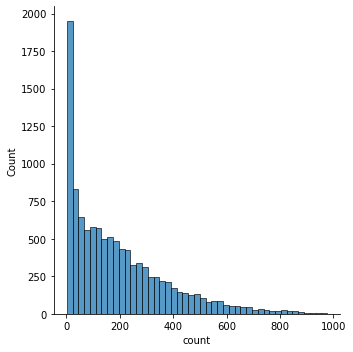

In [20]:
import seaborn as sns
sns.displot(y)                      # y가 count x가 적게빌린날, 많이 빌린날
# 적게빌린날이 많고, 많이 빌린날은 별로 없음 

### [Q3] Y의 로그값 분포 시각화하기

(힌트) 히스토그램을 그려보세요.  
(힌트) 로그변환: numpy의 log1p() 함수


<AxesSubplot:>

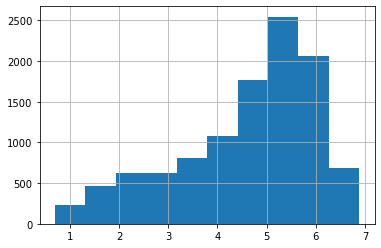

In [21]:
#[Q3]을 해결하기 위한 코드를 작성하세요

# 기존 y는 한쪽으로 치우친 형태의 그래프였음
# y의 로그 연산을 수행해서 정규분포의 형태로 데이터를 변환
# (참고)
# 로그연산의 장점: 지수 연산을 사용해서 다시 원본 데이터로 변환하기 유리함


y_log = np.log1p(y)              
# scale를 이용해서 정규화하지말고, log를 이용해서 정규화하는게 더 정확하다는 연구 결과때문,,
# 선형회귀는 정규화해서 하라는 말이 있어서, 정규화하려고 함!
# 나중에 exp해서 실제값으로 복원도 편함!
y_log.hist()

### [Q4] Y의 로그값을 사용하여 모델 만들어보기

* 모델 학습, 예측, 평가는 get_model_predict()를 이용하세요.

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.3, random_state=1)

In [23]:
def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if is_expm1 :
        # 테스트 데이터 셋의 Target 값은 Log 변환되었으므로 다시 expm1를 이용하여 원래 scale로 변환
        y_test = np.expm1(y_test)
        # 예측 값 역시 Log 변환된 타겟 기반으로 학습되어 예측되었으므로 다시 exmpl으로 scale변환
        pred = np.expm1(pred)
    print('###',model.__class__.__name__,'###')
    rmsle(y_test, pred)

In [24]:
#[Q4]을 해결하기 위한 코드를 작성하세요
lr_model_with_log = LinearRegression()

get_model_predict(lr_model_with_log,X_train, X_test, y_train, y_test, is_expm1=True )


### LinearRegression ###
RMSLE: 1.0114


### [Q5] 선형회귀모델에서 가장 영향을 많으 주는 종속변수 알아보기
아래 함수를 실행시키세요

In [25]:
def plotFeatureList(model, X):
    coef = pd.Series(model.coef_, index=X.columns)  
#model.coef_ 하면 weight 값을 출력하게 됨, y= wx+b  여기서 w 값을 출력함, w가 칼수록 x가 중요함 
    coef_sort = coef.sort_values(ascending=False)
    sns.barplot(x=coef_sort.values, y=coef_sort.index)

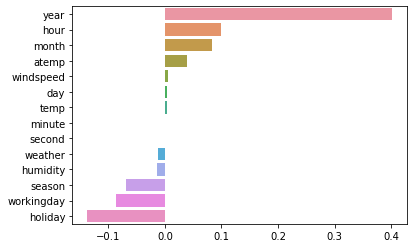

In [26]:
#[Q5]을 해결하기 위한 코드를 작성하세요
plotFeatureList(lr_model_with_log, X)

# Year가 굉장히 중요한 변수라고 말하는 중
# 근데 실제로 year가 중요하지 않으니까, 뭔가 전처리가 더 필요하고, year가 2개밖에 안되니까 카테고리 하자

### [Q6] 수치형 데이터 중 카테고리형 데이터 One Hot Encoding 하기

In [27]:
#[Q6]을 해결하기 위한 코드를 작성하세요
# 크기를 가지고 있는 애들을 없애고 , 그냥 데이터를 구분하려고 원 핫 인코딩 하는 것
# 크기는 중요하지 않고 그냥 구분하고 싶어!, year가 너무 크잖아

# 이때 이용하는게 판다스의 get_dummies

X_features_ohe = pd.get_dummies(X, columns=['year', 'month','day', 'hour', 'holiday',
                                              'workingday','season','weather'])
X_features_ohe
# year은 총 2개이고, 2011년에 해당하는 데이터이면 2011에 1 나머지는 0
# month는 총 12개이고 1월달에 해당하면 1월에 1 나머지는 다 0
# 크기는 없어지고 구분만 하려고 

,temp,atemp,humidity,windspeed,minute,second,year_2011,year_2012,month_1,month_2,...,workingday_0,workingday_1,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,9.84,14.395,81,0.0000,0,0,1,0,1,0,...,1,0,1,0,0,0,1,0,0,0
1,9.02,13.635,80,0.0000,0,0,1,0,1,0,...,1,0,1,0,0,0,1,0,0,0
2,9.02,13.635,80,0.0000,0,0,1,0,1,0,...,1,0,1,0,0,0,1,0,0,0
3,9.84,14.395,75,0.0000,0,0,1,0,1,0,...,1,0,1,0,0,0,1,0,0,0
4,9.84,14.395,75,0.0000,0,0,1,0,1,0,...,1,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,15.58,19.695,50,26.0027,0,0,0,1,0,0,...,0,1,0,0,0,1,1,0,0,0
10882,14.76,17.425,57,15.0013,0,0,0,1,0,0,...,0,1,0,0,0,1,1,0,0,0
10883,13.94,15.910,61,15.0013,0,0,0,1,0,0,...,0,1,0,0,0,1,1,0,0,0
10884,13.94,17.425,61,6.0032,0,0,0,1,0,0,...,0,1,0,0,0,1,1,0,0,0


### [Q7] One Hot Encoding 적용된 feature 데이터 세트 기반으로 학습/예측 

 * 데이터 분할
 * 학습: LinearRegression, RandomForestRegressor, GradientBoostingRegressor, XGBRegressor, LGBMRegressor
 * 예측
 * 평가

In [28]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [29]:
#[Q7]을 해결하기 위한 코드를 작성하세요

In [30]:
# 원-핫 인코딩이 적용된 feature 데이터 세트 기반으로 학습/예측 데이터 분할. 
X_train, X_test, y_train, y_test = train_test_split(X_features_ohe, y_log, test_size=0.3, random_state=1)

# LinearRegression, 랜덤 포레스트, GBM, XGBoost, LightGBM model 별로 평가 수행
lr_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=500)
gbm_model = GradientBoostingRegressor(n_estimators=500)
xgb_model = XGBRegressor(n_estimators=500)
lgbm_model = LGBMRegressor(n_estimators=500)

model_list = [lr_model, rf_model, gbm_model, xgb_model, lgbm_model]
for model in model_list:
    get_model_predict(model,X_train, X_test, y_train, y_test,is_expm1=True)

### LinearRegression ###
RMSLE: 0.5835
### RandomForestRegressor ###
RMSLE: 0.3447
### GradientBoostingRegressor ###
RMSLE: 0.3342
### XGBRegressor ###
RMSLE: 0.3376
### LGBMRegressor ###
RMSLE: 0.3102


## Step3. 개선

### test파일 불러오기

In [40]:
bike_test_df = pd.read_csv('test.csv')

In [41]:
bike_test_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981


In [42]:
bike_test_df['datetime'] = bike_test_df['datetime'].astype('datetime64')     # 날짜형으로 형 변환
bike_test_df['year'] = bike_test_df['datetime'].dt.year
bike_test_df['month'] = bike_test_df['datetime'].dt.month
bike_test_df['day'] = bike_test_df['datetime'].dt.day
bike_test_df['hour'] = bike_test_df['datetime'].dt.hour
bike_test_df['minute'] = bike_test_df['datetime'].dt.minute
bike_test_df['second'] = bike_test_df['datetime'].dt.second


In [43]:
bike_df.head(2)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour,minute,second
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,0,0,0
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,1,0,0


In [44]:
drop_columns = ['datetime']
bike_test_df.drop(drop_columns, axis=1, inplace=True)

In [45]:
bike_test_df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,minute,second
0,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0,0,0
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1,0,0
2,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2,0,0
3,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,0,0
4,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4,0,0


In [46]:
X = bike_test_df

## [MinMaxScaler]

In [31]:
bike_df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour,minute,second
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,0,0,0
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,1,0,0
2,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,2,0,0
3,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,1,3,0,0
4,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,1,4,0,0


In [32]:
bike_df.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'count', 'year', 'month', 'day', 'hour',
       'minute', 'second'],
      dtype='object')

In [37]:
from sklearn.preprocessing import MinMaxScaler
# MinMaxScaler  각각의 min값과 max 값을 0, 1로 바꿔준다


scaler = MinMaxScaler()
scaler.fit(bike_df)
scaled_array = scaler.transform(bike_df)

scaled_df = pd.DataFrame(data=scaled_array)
scaled_df.columns = bike_df.columns
scaled_df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour,minute,second
0,0.0,0.0,0.0,0.0,0.224490,0.305068,0.81,0.000000,0.015369,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.204082,0.288064,0.80,0.000000,0.039959,0.0,0.0,0.0,0.043478,0.0,0.0
2,0.0,0.0,0.0,0.0,0.204082,0.288064,0.80,0.000000,0.031762,0.0,0.0,0.0,0.086957,0.0,0.0
3,0.0,0.0,0.0,0.0,0.224490,0.305068,0.75,0.000000,0.012295,0.0,0.0,0.0,0.130435,0.0,0.0
4,0.0,0.0,0.0,0.0,0.224490,0.305068,0.75,0.000000,0.000000,0.0,0.0,0.0,0.173913,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,1.0,0.0,1.0,0.0,0.367347,0.423649,0.50,0.456213,0.343238,1.0,1.0,1.0,0.826087,0.0,0.0
10882,1.0,0.0,1.0,0.0,0.346939,0.372860,0.57,0.263195,0.245902,1.0,1.0,1.0,0.869565,0.0,0.0
10883,1.0,0.0,1.0,0.0,0.326531,0.338964,0.61,0.263195,0.171107,1.0,1.0,1.0,0.913043,0.0,0.0
10884,1.0,0.0,1.0,0.0,0.326531,0.372860,0.61,0.105325,0.131148,1.0,1.0,1.0,0.956522,0.0,0.0


In [38]:
y_train = scaled_df['count']
X_train = scaled_df.drop(['count'],axis=1,inplace=False)


# 학습용 데이터와 테스트용 데이터로 나눔
# X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=0.3, random_state=1)
# # 30%만 테스트로 쓰겠습니다!
X_train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,minute,second
0,0.0,0.0,0.0,0.0,0.224490,0.305068,0.81,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.204082,0.288064,0.80,0.0,0.0,0.0,0.0,0.043478,0.0,0.0
2,0.0,0.0,0.0,0.0,0.204082,0.288064,0.80,0.0,0.0,0.0,0.0,0.086957,0.0,0.0
3,0.0,0.0,0.0,0.0,0.224490,0.305068,0.75,0.0,0.0,0.0,0.0,0.130435,0.0,0.0
4,0.0,0.0,0.0,0.0,0.224490,0.305068,0.75,0.0,0.0,0.0,0.0,0.173913,0.0,0.0


In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train ,y_train )

LinearRegression()

In [47]:
y_preds = lr.predict(X)

print('bias:',lr.intercept_)
print('weight:', np.round(lr.coef_, 1))
y_preds

bias: -0.006001959969636622
weight: [-0.  -0.   0.  -0.   0.1  0.2 -0.2  0.   0.1  0.1  0.   0.2  0.   0. ]


array([163.11656033, 162.86717855, 163.05047355, ..., 167.31789699,
       168.42719355, 166.73137779])

In [48]:
submission = pd.read_csv('sampleSubmission.csv')
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [49]:
submission['count'] = y_preds
submission.head()

,datetime,count
0,2011-01-20 00:00:00,163.116560
1,2011-01-20 01:00:00,162.867179
2,2011-01-20 02:00:00,163.050474
3,2011-01-20 03:00:00,163.460796
4,2011-01-20 04:00:00,163.644091


In [50]:
submission.to_csv('RandomForest_casual_registered.csv', index=False)

## 아웃라이어 빼보기(전처리)

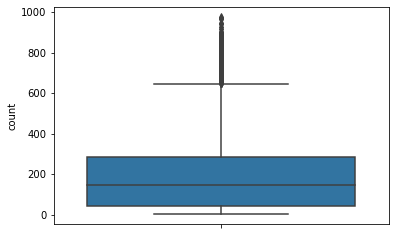

In [51]:
sns.boxplot(data=bike_df, y='count')
plt.show()

In [52]:
bike_df.shape

(10886, 15)

In [53]:
Q1 = bike_df['count'].quantile(0.25)
Q3 = bike_df['count'].quantile(0.75)
IQR = Q3-Q1
bike_df = bike_df[((bike_df['count'])<(Q1 - 1.5*IQR))|((bike_df['count'])<(Q1 + 1.5*IQR))]
bike_df.shape

(9476, 15)

In [54]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9476 entries, 0 to 10885
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      9476 non-null   int64  
 1   holiday     9476 non-null   int64  
 2   workingday  9476 non-null   int64  
 3   weather     9476 non-null   int64  
 4   temp        9476 non-null   float64
 5   atemp       9476 non-null   float64
 6   humidity    9476 non-null   int64  
 7   windspeed   9476 non-null   float64
 8   count       9476 non-null   int64  
 9   year        9476 non-null   int64  
 10  month       9476 non-null   int64  
 11  day         9476 non-null   int64  
 12  hour        9476 non-null   int64  
 13  minute      9476 non-null   int64  
 14  second      9476 non-null   int64  
dtypes: float64(3), int64(12)
memory usage: 1.2 MB


#### MaxABbsScaler

In [55]:
from sklearn.preprocessing import MaxAbsScaler
maxAbsScaler = MaxAbsScaler()
maxAbsScaler.fit(bike_df)

bike_df_maxAbsScaled = maxAbsScaler.transform(bike_df)

scaled_bike_df = pd.DataFrame(data=bike_df_maxAbsScaled)
scaled_bike_df.columns = bike_df.columns
scaled_bike_df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour,minute,second
0,0.25,0.0,0.0,0.25,0.24,0.316687,0.81,0.000000,0.039604,0.999503,0.083333,0.052632,0.000000,0.0,0.0
1,0.25,0.0,0.0,0.25,0.22,0.299967,0.80,0.000000,0.099010,0.999503,0.083333,0.052632,0.043478,0.0,0.0
2,0.25,0.0,0.0,0.25,0.22,0.299967,0.80,0.000000,0.079208,0.999503,0.083333,0.052632,0.086957,0.0,0.0
3,0.25,0.0,0.0,0.25,0.24,0.316687,0.75,0.000000,0.032178,0.999503,0.083333,0.052632,0.130435,0.0,0.0
4,0.25,0.0,0.0,0.25,0.24,0.316687,0.75,0.000000,0.002475,0.999503,0.083333,0.052632,0.173913,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9471,1.00,0.0,1.0,0.25,0.38,0.433286,0.50,0.456213,0.831683,1.000000,1.000000,1.000000,0.826087,0.0,0.0
9472,1.00,0.0,1.0,0.25,0.36,0.383346,0.57,0.263195,0.596535,1.000000,1.000000,1.000000,0.869565,0.0,0.0
9473,1.00,0.0,1.0,0.25,0.34,0.350016,0.61,0.263195,0.415842,1.000000,1.000000,1.000000,0.913043,0.0,0.0
9474,1.00,0.0,1.0,0.25,0.34,0.383346,0.61,0.105325,0.319307,1.000000,1.000000,1.000000,0.956522,0.0,0.0


In [56]:
y_train = scaled_bike_df['count']
X_train = scaled_bike_df.drop(['count'],axis=1,inplace=False)


# 학습용 데이터와 테스트용 데이터로 나눔
# X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=0.3, random_state=1)
# 30%만 테스트로 쓰겠습니다!
X_train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,minute,second
0,0.25,0.0,0.0,0.25,0.24,0.316687,0.81,0.0,0.999503,0.083333,0.052632,0.000000,0.0,0.0
1,0.25,0.0,0.0,0.25,0.22,0.299967,0.80,0.0,0.999503,0.083333,0.052632,0.043478,0.0,0.0
2,0.25,0.0,0.0,0.25,0.22,0.299967,0.80,0.0,0.999503,0.083333,0.052632,0.086957,0.0,0.0
3,0.25,0.0,0.0,0.25,0.24,0.316687,0.75,0.0,0.999503,0.083333,0.052632,0.130435,0.0,0.0
4,0.25,0.0,0.0,0.25,0.24,0.316687,0.75,0.0,0.999503,0.083333,0.052632,0.173913,0.0,0.0


In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train ,y_train )

LinearRegression()

In [58]:
y_preds = lr.predict(X)

print('bias:',lr.intercept_)
print('weight:', np.round(lr.coef_, 1))
y_preds

bias: -154.67212948884824
weight: [-1.000e-01 -0.000e+00 -0.000e+00  0.000e+00  1.000e-01  3.000e-01
 -4.000e-01  0.000e+00  1.548e+02  2.000e-01  0.000e+00  4.000e-01
  0.000e+00  0.000e+00]


array([311163.51549565, 311163.37359153, 311163.72668998, ...,
       311326.3968967 , 311328.33005549, 311325.45919532])

In [59]:
submission['count'] = y_preds
submission.head()

,datetime,count
0,2011-01-20 00:00:00,311163.515496
1,2011-01-20 01:00:00,311163.373592
2,2011-01-20 02:00:00,311163.726690
3,2011-01-20 03:00:00,311164.354838
4,2011-01-20 04:00:00,311164.707936


In [60]:
submission.to_csv('RandomForest_Max.csv', index=False)

## Step4. 제출

#### MaxABbsScaler

In [ ]:
from sklearn.preprocessing import MaxAbsScaler
maxAbsScaler = MaxAbsScaler()
maxAbsScaler.fit(bike_df)

bike_df_maxAbsScaled = maxAbsScaler.transform(bike_df)

scaled_bike_df = pd.DataFrame(data=bike_df_maxAbsScaled)
scaled_bike_df.columns = bike_df.columns
scaled_bike_df

In [ ]:
y = scaled_bike_df['count']
X = scaled_bike_df.drop(['count'],axis=1,inplace=False)


# 학습용 데이터와 테스트용 데이터로 나눔
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=0.3, random_state=1)
# 30%만 테스트로 쓰겠습니다!
X_train.head()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train ,y_train )

In [ ]:
y_preds = lr.predict(X_test)

print('bias:',lr.intercept_)
print('weight:', np.round(lr.coef_, 1))
y_preds

In [ ]:
def rmsle(y, pred):
    log_y = np.log1p(y)             
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    print('RMSLE: {0:.4f}'.format(rmsle))
    return rmsle
rmsle(y_test, y_preds)

In [ ]:
model_list = [lr_model, rf_model, gbm_model, xgb_model, lgbm_model]

for model in model_list:
    # 학습
    model.fit(X_train , y_train)

    # 예측
    pred = model.predict(X_test)
    
    # 평가
    res =  rmsle(y_test, pred)
    
    model_name = model.__class__.__name__
    print('{0} 오차: {1:.4f}\n'.format(model_name, res)) 

#### 하이퍼 파라미터 찾아보기

In [ ]:
# 랜덤포레스트 파라미터 찾기 

params = {
    'n_estimators':[100],
    'max_depth' : [6, 8, 10, 12], 
    'min_samples_leaf' : [8, 12, 18],
    'min_samples_split' : [8, 16, 20]
}
grid_rf = GridSearchCV(rf_model, param_grid=params, cv=3)
grid_rf.fit(X_train, y_train)
print('최적 하이 파라미터:', grid_rf.best_params_)

In [ ]:
estimator = grid_rf.best_estimator_  # grid_rf.best_estimator_ 이 애가 최적에 파라미터가 적용된 모델
estimator

In [ ]:
def get_model_predict(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
   
    print('###',model.__class__.__name__,'###')
    rmsle(y_test, pred)

In [ ]:
get_model_predict(estimator, X_train, X_test, y_train, y_test)